# Import libraries

In [1]:
#Exploratory Data Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline                       
import seaborn as sns
color = sns.color_palette(palette = 'deep')
import warnings
warnings.filterwarnings("ignore")

# Read the Data

In [2]:
#dd - Data Description
#cc - Customer Churn

In [3]:
dd = pd.read_excel(r"D:\Reshma\Great Lakes\Capstone Project\Customer Churn Data.xlsx",'Meta Data')
cc = pd.read_excel(r"D:\Reshma\Great Lakes\Capstone Project\Customer Churn Data.xlsx",'Data for DSBA')
print(dd.head())
''' 

'''
print(cc.head())

   Unnamed: 0 Unnamed: 1                       Unnamed: 2 Unnamed: 3  \
0         NaN   Variable                      Description        NaN   
1         NaN  AccountID        account unique identifier        num   
2         NaN      Churn      account churn flag (Target)        Cat   
3         NaN     Tenure                Tenure of account        cat   
4         NaN  City_Tier  Tier of primary customer's city        cat   

  Unnamed: 4  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  
   AccountID  Churn Tenure  City_Tier  CC_Contacted_LY           Payment  \
0      20003      1      0        3.0             15.0        Debit Card   
1      20004      1      0        1.0             12.0       Credit Card   
2      20006      1      2        3.0             11.0  Cash on Delivery   
3      20009      1      0        1.0             31.0        Debit Card   
4      20010      1      4        NaN             18.0  Cash on Delivery   

  Gender  Service_Sc

In [4]:
## Checking the shape and datatype of each variables in the dataset

In [5]:
cc.shape

(11260, 19)

In [6]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

There are missing values in majority of the colums except AccountID, Churn, rev_growth_yoy and coupon_used_for_payment.
We must check the unique values in the columns as there might be some undesirable or non-relatable values like $,@ etc.
Also, we can drop the column AccountID as that would not be useful for the analysis.

There are 5 float type, 2 integer type and 12 categorical type variables. 

Some columns are of the incorrect datatype such as cashback, revenue per month, revenue growth and a few others are all object datatypes.

In [7]:
#We shall also look into the number of unique/distinct values of each columns.

In [8]:
cc['Churn'].value_counts()

0    9364
1    1896
Name: Churn, dtype: int64

In [9]:
cc['Churn'].value_counts(normalize=True)

0    0.831616
1    0.168384
Name: Churn, dtype: float64

In [10]:
cc['Tenure'].value_counts()

1     1351
0     1231
8      519
9      496
7      450
10     423
3      410
4      403
5      403
11     388
6      363
12     360
13     359
2      354
14     345
15     311
16     291
19     273
18     253
20     217
17     215
21     170
23     169
22     151
24     147
28     137
30     137
27     131
99     131
26     122
#      116
25     114
29     114
31      96
50       2
51       2
60       2
61       2
Name: Tenure, dtype: int64

In [11]:
cc['City_Tier'].value_counts()

1.0    7263
3.0    3405
2.0     480
Name: City_Tier, dtype: int64

In [12]:
cc['Payment'].value_counts()

Debit Card          4587
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64

In [13]:
cc['Gender'].value_counts()

Male      6328
Female    4178
M          376
F          270
Name: Gender, dtype: int64

In [14]:
cc['Service_Score'].value_counts()

3.0    5490
2.0    3251
4.0    2331
1.0      77
0.0       8
5.0       5
Name: Service_Score, dtype: int64

In [15]:
cc['Account_user_count'].value_counts()

4    4569
3    3261
5    1699
2     526
1     446
@     332
6     315
Name: Account_user_count, dtype: int64

In [16]:
cc['account_segment'].value_counts()

Super           4062
Regular Plus    3862
HNI             1639
Super Plus       771
Regular          520
Regular +        262
Super +           47
Name: account_segment, dtype: int64

In [17]:
cc['CC_Agent_Score'].value_counts()

3.0    3360
1.0    2302
5.0    2191
4.0    2127
2.0    1164
Name: CC_Agent_Score, dtype: int64

In [18]:
cc['Marital_Status'].value_counts()

Married     5860
Single      3520
Divorced    1668
Name: Marital_Status, dtype: int64

In [19]:
cc['rev_per_month'].value_counts()

3      1746
2      1585
5      1337
4      1218
6      1085
7       754
+       689
8       643
9       564
10      413
1       402
11      278
12      166
13       93
14       48
15       24
102       8
123       5
107       5
124       5
140       4
136       4
133       4
129       4
118       4
110       3
130       3
127       3
101       3
117       3
119       3
137       3
126       3
116       3
138       3
113       3
115       3
108       3
134       2
19        2
131       2
121       2
22        2
105       2
114       2
139       2
125       2
120       2
23        1
111       1
20        1
100       1
109       1
25        1
135       1
21        1
104       1
122       1
103       1
Name: rev_per_month, dtype: int64

In [20]:
cc['rev_growth_yoy'].value_counts()

14    1524
13    1427
15    1283
12    1210
16     949
18     708
17     704
19     619
20     562
11     523
21     433
22     403
23     345
24     229
25     188
26      98
27      35
28      14
$        3
4        3
Name: rev_growth_yoy, dtype: int64

In [21]:
cc['Day_Since_CC_connect'].value_counts()

3     1816
2     1574
1     1256
8     1169
0      964
7      911
4      893
9      622
5      479
10     339
6      229
11     183
12     146
13     117
14      74
15      37
17      34
16      26
18      26
30       2
31       2
47       2
46       1
$        1
Name: Day_Since_CC_connect, dtype: int64

In [22]:
cc['Login_device'].value_counts()

Mobile      7482
Computer    3018
&&&&         539
Name: Login_device, dtype: int64

In [23]:
## Missing values and Duplicates

In [24]:
cc.isnull().sum().sum()

2676

In [25]:
cc.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [26]:
cc.isnull().sum()*100/len(cc)

AccountID                  0.000000
Churn                      0.000000
Tenure                     0.905861
City_Tier                  0.994671
CC_Contacted_LY            0.905861
Payment                    0.968028
Gender                     0.959147
Service_Score              0.870337
Account_user_count         0.994671
account_segment            0.861456
CC_Agent_Score             1.030195
Marital_Status             1.882771
rev_per_month              0.905861
Complain_ly                3.170515
rev_growth_yoy             0.000000
coupon_used_for_payment    0.000000
Day_Since_CC_connect       3.170515
cashback                   4.182948
Login_device               1.962700
dtype: float64

In [27]:
cc.isnull().sum()/cc.isnull().sum().sum()*100

AccountID                   0.000000
Churn                       0.000000
Tenure                      3.811659
City_Tier                   4.185351
CC_Contacted_LY             3.811659
Payment                     4.073244
Gender                      4.035874
Service_Score               3.662182
Account_user_count          4.185351
account_segment             3.624813
CC_Agent_Score              4.334828
Marital_Status              7.922272
rev_per_month               3.811659
Complain_ly                13.340807
rev_growth_yoy              0.000000
coupon_used_for_payment     0.000000
Day_Since_CC_connect       13.340807
cashback                   17.600897
Login_device                8.258595
dtype: float64

In [28]:
cc.duplicated().sum()

0

In [29]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


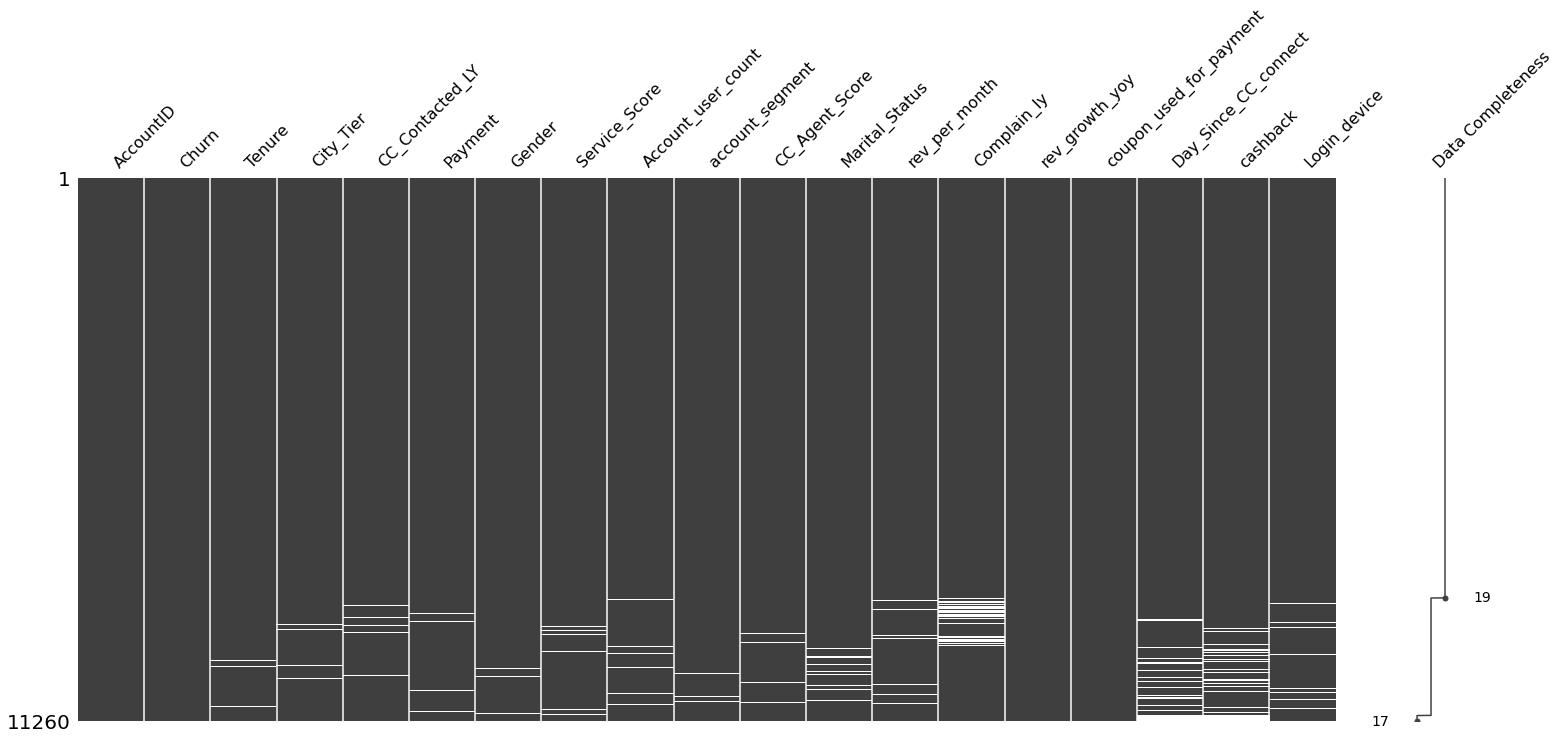

In [30]:
import missingno as msno

msno.matrix(cc, labels=True, sort="descending");

### Missing values per feature

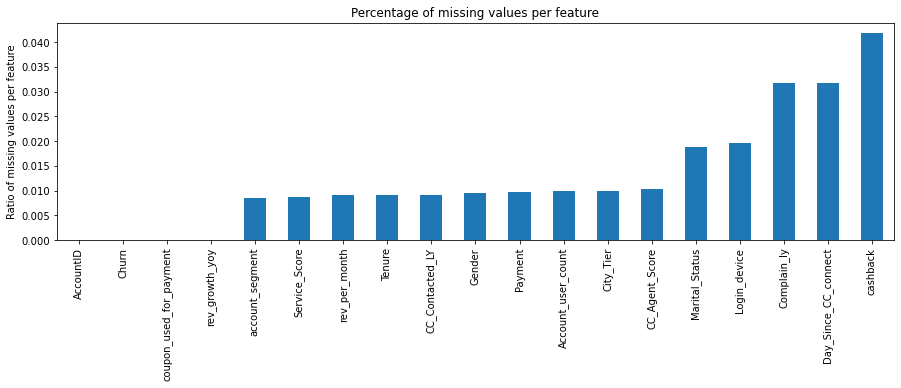

In [31]:
cc.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

In [32]:
#There are no duplicates but there are 2676 missing values in the dataset.

In [33]:
### Gender

In [34]:
cc.Gender= cc.Gender.replace("M","Male" )

In [35]:
cc.Gender= cc.Gender.replace("F","Female" )

In [36]:
cc.Gender.value_counts()

Male      6704
Female    4448
Name: Gender, dtype: int64

In [37]:
### Account Segment - Regular Plus and Regular + can be clubbed similar to Super Plus and Super +.

In [38]:
cc.account_segment= cc.account_segment.replace("Super +","Super Plus")

In [39]:
cc.account_segment= cc.account_segment.replace("Regular +","Regular Plus")

In [40]:
cc.account_segment.value_counts()

Regular Plus    4124
Super           4062
HNI             1639
Super Plus       818
Regular          520
Name: account_segment, dtype: int64

In [41]:
cc.Login_device= cc.Login_device.replace("&&&&","Others")

In [42]:
cc.Login_device.value_counts()

Mobile      7482
Computer    3018
Others       539
Name: Login_device, dtype: int64

In [43]:
cc['Tenure'] = pd.to_numeric(cc['Tenure'], errors='coerce')

In [44]:
cc['Account_user_count'] = pd.to_numeric(cc['Account_user_count'], errors='coerce')

In [45]:
cc['rev_per_month'] = pd.to_numeric(cc['rev_per_month'], errors='coerce')

In [46]:
cc['rev_growth_yoy'] = pd.to_numeric(cc['rev_growth_yoy'],errors='coerce')

In [47]:
cc['coupon_used_for_payment'] = pd.to_numeric(cc['coupon_used_for_payment'],errors='coerce')

In [48]:
cc['Day_Since_CC_connect'] = pd.to_numeric(cc['Day_Since_CC_connect'], errors='coerce')

In [49]:
cc['cashback'] = pd.to_numeric(cc['cashback'], errors='coerce')

In [50]:
cc.dtypes

AccountID                    int64
Churn                        int64
Tenure                     float64
City_Tier                  float64
CC_Contacted_LY            float64
Payment                     object
Gender                      object
Service_Score              float64
Account_user_count         float64
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month              float64
Complain_ly                float64
rev_growth_yoy             float64
coupon_used_for_payment    float64
Day_Since_CC_connect       float64
cashback                   float64
Login_device                object
dtype: object

## Descriptive Summary

In [51]:
cc.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
AccountID,11260.0,NaN,NaN,NaN,25629.5,3250.62635,20000.0,22814.75,25629.5,28444.25,31259.0
Churn,11260.0,NaN,NaN,NaN,0.168384,0.374223,0.0,0.0,0.0,0.0,1.0
Tenure,11042.0,NaN,NaN,NaN,11.025086,12.879782,0.0,2.0,9.0,16.0,99.0
City_Tier,11148.0,NaN,NaN,NaN,1.653929,0.915015,1.0,1.0,1.0,3.0,3.0
CC_Contacted_LY,11158.0,NaN,NaN,NaN,17.867091,8.853269,4.0,11.0,16.0,23.0,132.0
Payment,11151,5,Debit Card,4587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,11152,2,Male,6704,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Service_Score,11162.0,NaN,NaN,NaN,2.902526,0.725584,0.0,2.0,3.0,3.0,5.0
Account_user_count,10816.0,NaN,NaN,NaN,3.692862,1.022976,1.0,3.0,4.0,4.0,6.0
account_segment,11163,5,Regular Plus,4124,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Calculate missing values again

In [52]:
cc.isnull().sum().sum()

3822

In [53]:
cc.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     218
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         444
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   473
Login_device               221
dtype: int64

In [54]:
cc.isnull().sum()*100/len(cc)

AccountID                  0.000000
Churn                      0.000000
Tenure                     1.936057
City_Tier                  0.994671
CC_Contacted_LY            0.905861
Payment                    0.968028
Gender                     0.959147
Service_Score              0.870337
Account_user_count         3.943162
account_segment            0.861456
CC_Agent_Score             1.030195
Marital_Status             1.882771
rev_per_month              7.024867
Complain_ly                3.170515
rev_growth_yoy             0.026643
coupon_used_for_payment    0.026643
Day_Since_CC_connect       3.179396
cashback                   4.200710
Login_device               1.962700
dtype: float64

In [55]:
cc.isnull().sum()/cc.isnull().sum().sum()*100

AccountID                   0.000000
Churn                       0.000000
Tenure                      5.703820
City_Tier                   2.930403
CC_Contacted_LY             2.668760
Payment                     2.851910
Gender                      2.825746
Service_Score               2.564103
Account_user_count         11.616954
account_segment             2.537938
CC_Agent_Score              3.035060
Marital_Status              5.546834
rev_per_month              20.695971
Complain_ly                 9.340659
rev_growth_yoy              0.078493
coupon_used_for_payment     0.078493
Day_Since_CC_connect        9.366824
cashback                   12.375720
Login_device                5.782313
dtype: float64

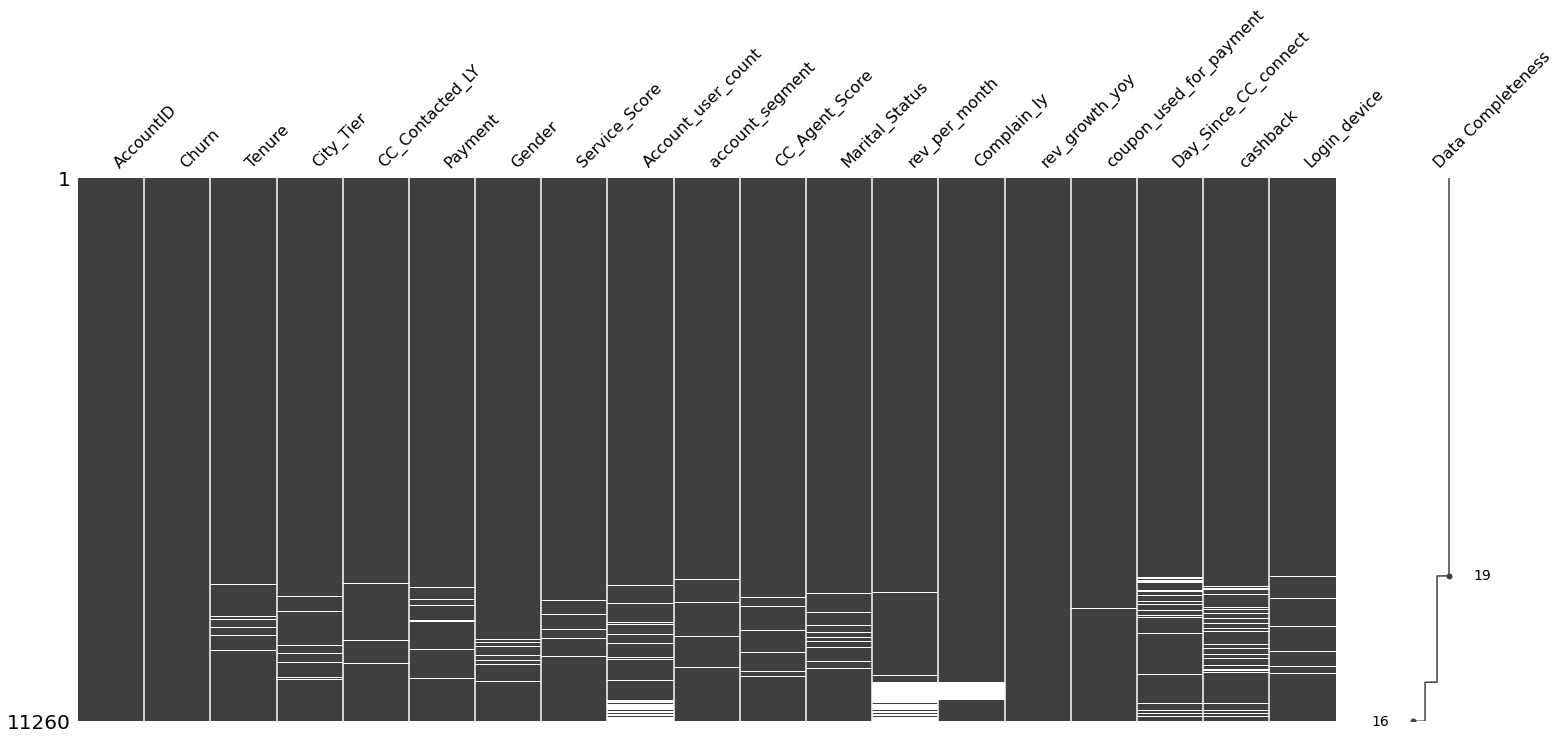

In [56]:
msno.matrix(cc, labels=True, sort="descending");

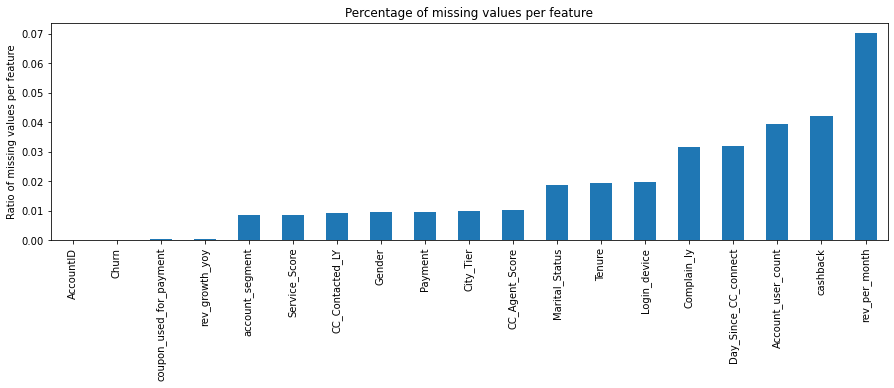

In [57]:
cc.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

## Feature Removal

In [58]:
cc = cc.drop(['AccountID'],axis=1)

In [59]:
cc.columns.to_list()

['Churn',
 'Tenure',
 'City_Tier',
 'CC_Contacted_LY',
 'Payment',
 'Gender',
 'Service_Score',
 'Account_user_count',
 'account_segment',
 'CC_Agent_Score',
 'Marital_Status',
 'rev_per_month',
 'Complain_ly',
 'rev_growth_yoy',
 'coupon_used_for_payment',
 'Day_Since_CC_connect',
 'cashback',
 'Login_device']

Let us also perform outlier detection

## Outlier Detection

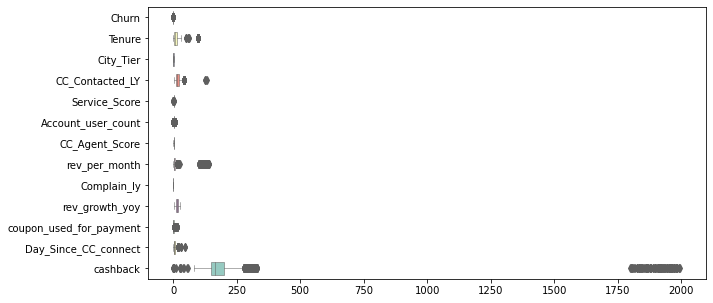

In [60]:
f, ax = plt.subplots(figsize=(10,5))
ax = sns.boxplot(data=cc,width=0.6,palette="Set3",orient='h',linewidth=0.5)

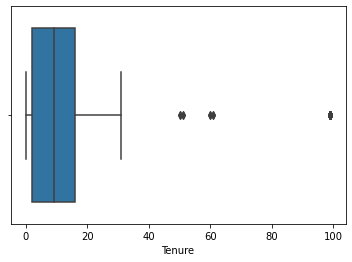

In [61]:
sns.boxplot(cc.Tenure)
plt.show()

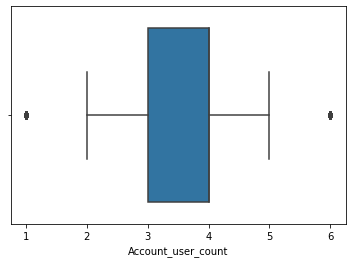

In [62]:
sns.boxplot(cc.Account_user_count)
plt.show()

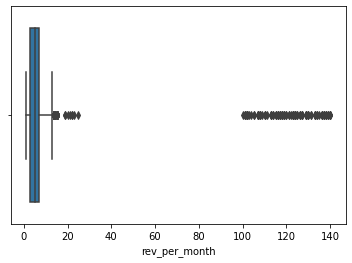

In [63]:
sns.boxplot(cc.rev_per_month)
plt.show()

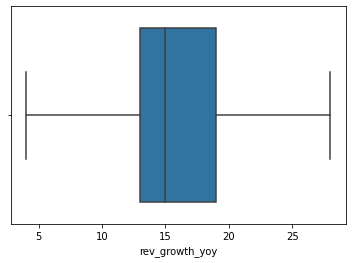

In [64]:
sns.boxplot(cc.rev_growth_yoy)
plt.show()

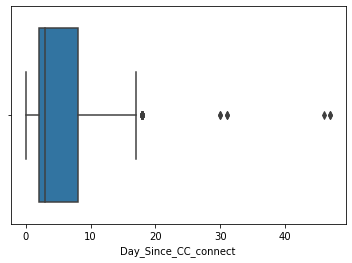

In [65]:
sns.boxplot(cc.Day_Since_CC_connect)
plt.show()

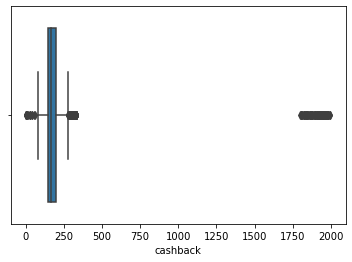

In [66]:
sns.boxplot(cc.cashback)
plt.show()

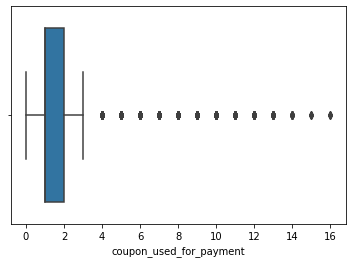

In [67]:
sns.boxplot(cc.coupon_used_for_payment)
plt.show()

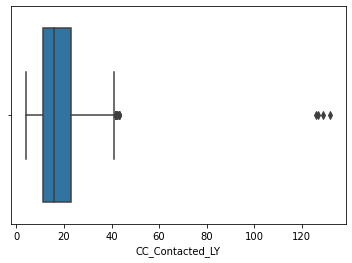

In [68]:
sns.boxplot(cc.CC_Contacted_LY)
plt.show()

# Univariate Analysis

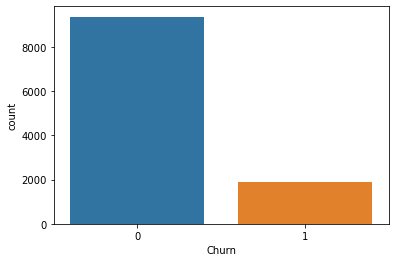

In [69]:
sns.countplot(cc['Churn'])
plt.show()

The target variable seems highly imbalanced.

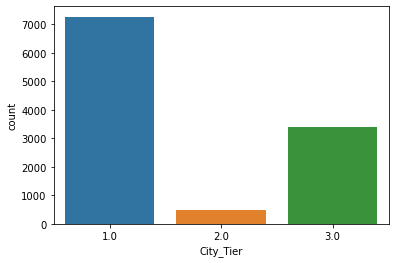

In [70]:
sns.countplot(cc['City_Tier'])
plt.show()

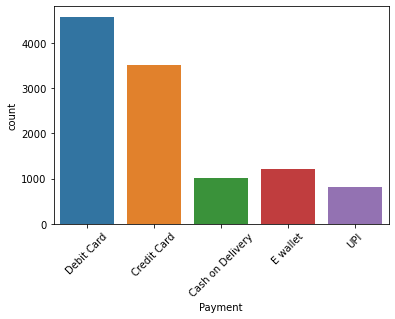

In [71]:
sns.countplot(cc['Payment'])
plt.xticks(rotation = 45)
plt.show()

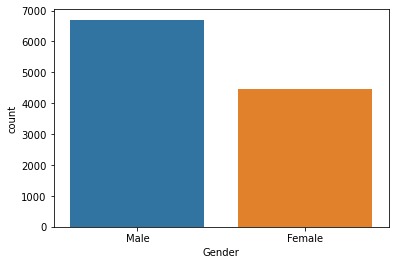

In [72]:
sns.countplot(cc['Gender'])
plt.show()

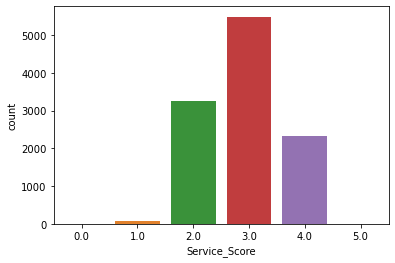

In [73]:
sns.countplot(cc['Service_Score'])
plt.show()

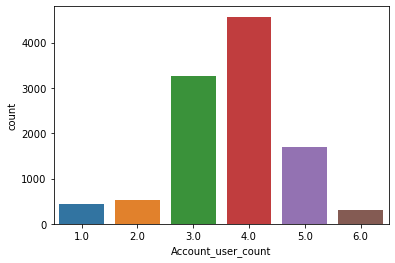

In [74]:
sns.countplot(cc['Account_user_count'])
plt.show()

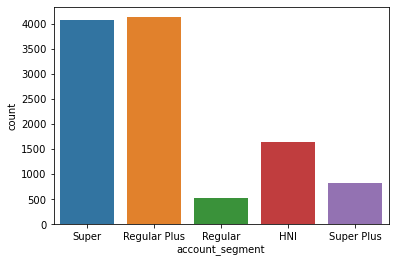

In [75]:
sns.countplot(cc['account_segment'])
plt.show()

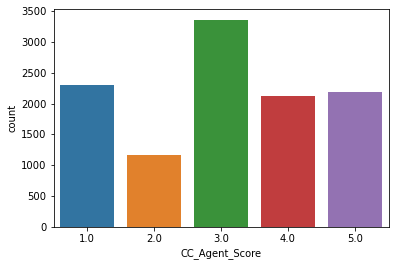

In [76]:
sns.countplot(cc['CC_Agent_Score'])
plt.show()

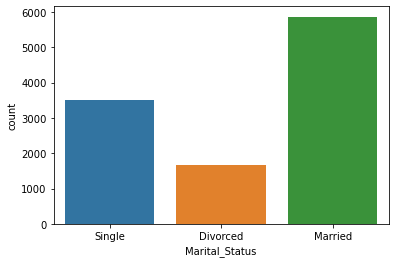

In [77]:
sns.countplot(cc['Marital_Status'])
plt.show()

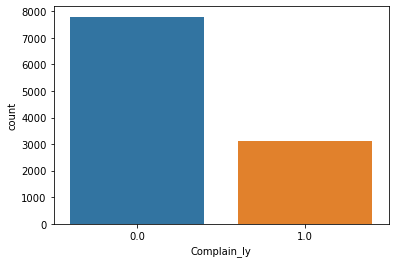

In [78]:
sns.countplot(cc['Complain_ly'])
plt.show()

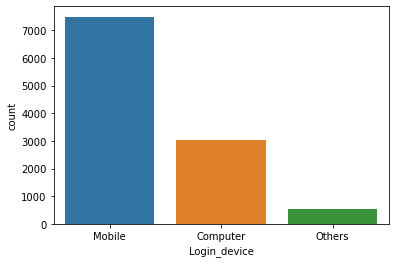

In [79]:
sns.countplot(cc['Login_device'])
plt.show()

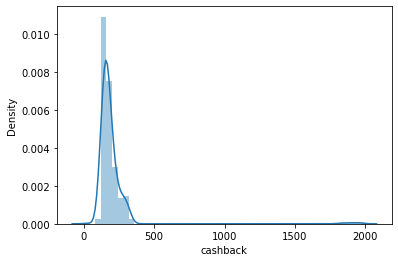

In [80]:
sns.distplot(cc['cashback'])
plt.show()

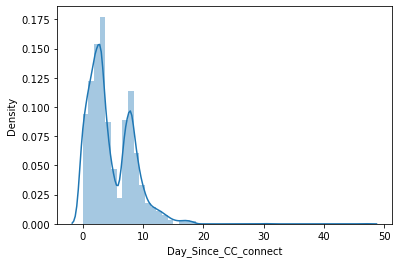

In [81]:
sns.distplot(cc['Day_Since_CC_connect'])
plt.show()

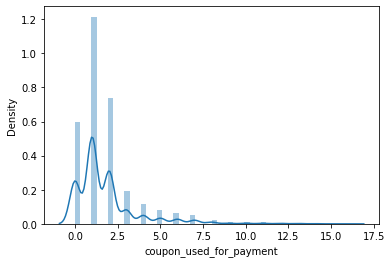

In [82]:
sns.distplot(cc['coupon_used_for_payment'])
plt.show()

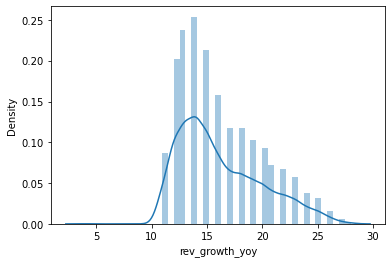

In [83]:
sns.distplot(cc['rev_growth_yoy'])
plt.show()

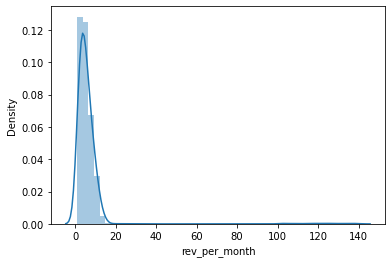

In [84]:
sns.distplot(cc['rev_per_month'])
plt.show()

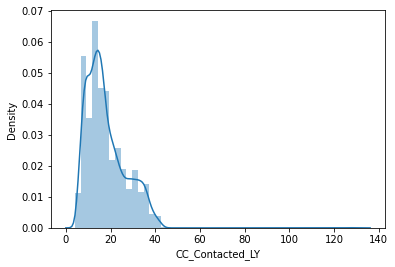

In [85]:
sns.distplot(cc['CC_Contacted_LY'])
plt.show()

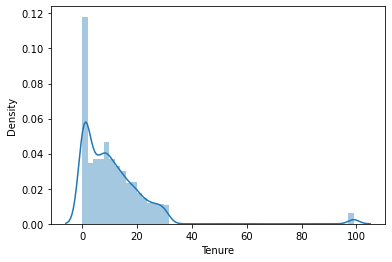

In [86]:
sns.distplot(cc['Tenure'])
plt.show()

In [87]:
cc.Churn = cc.Churn.astype('object')

In [88]:
cc.dtypes

Churn                       object
Tenure                     float64
City_Tier                  float64
CC_Contacted_LY            float64
Payment                     object
Gender                      object
Service_Score              float64
Account_user_count         float64
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month              float64
Complain_ly                float64
rev_growth_yoy             float64
coupon_used_for_payment    float64
Day_Since_CC_connect       float64
cashback                   float64
Login_device                object
dtype: object

## Bivariate Analysis

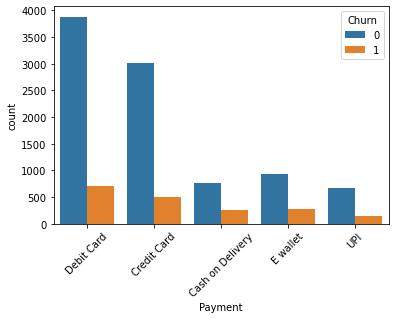

In [89]:
sns.countplot(x='Payment',hue='Churn',data = cc)
plt.xticks(rotation=45)
plt.show()

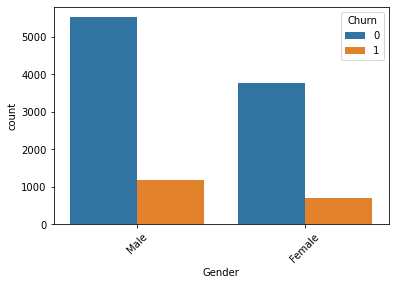

In [90]:
sns.countplot(x='Gender',hue='Churn',data = cc)
plt.xticks(rotation=45)
plt.show()

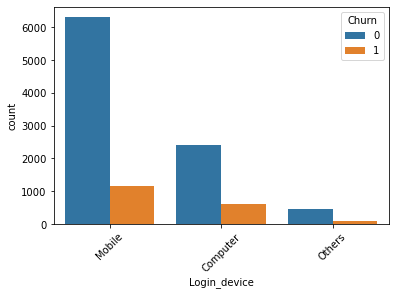

In [91]:
sns.countplot(x='Login_device',hue='Churn',data = cc)
plt.xticks(rotation=45)
plt.show()

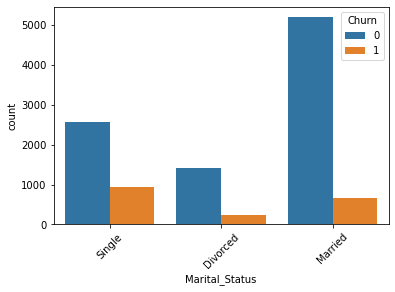

In [92]:
sns.countplot(x='Marital_Status',hue='Churn',data = cc)
plt.xticks(rotation=45)
plt.show()

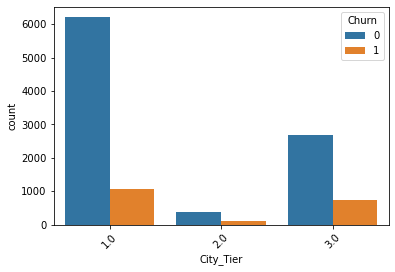

In [93]:
sns.countplot(x='City_Tier',hue='Churn',data = cc)
plt.xticks(rotation=45)
plt.show()

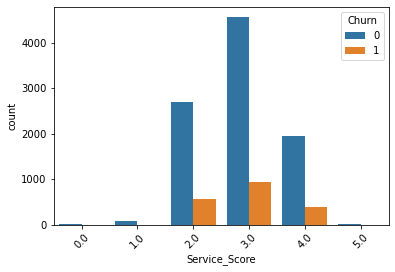

In [94]:
sns.countplot(x='Service_Score',hue='Churn',data = cc)
plt.xticks(rotation=45)
plt.show()

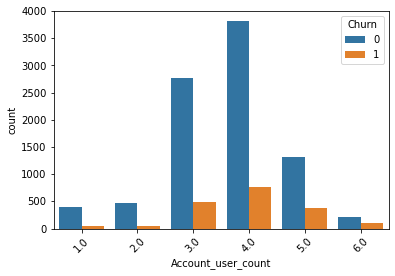

In [95]:
sns.countplot(x='Account_user_count',hue='Churn',data = cc)
plt.xticks(rotation=45)
plt.show()

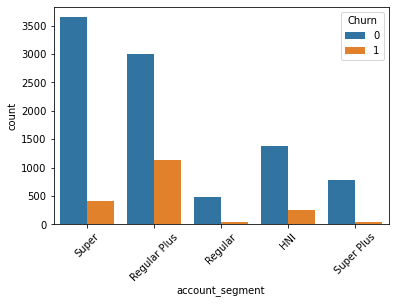

In [96]:
sns.countplot(x='account_segment',hue='Churn',data = cc)
plt.xticks(rotation=45)
plt.show()

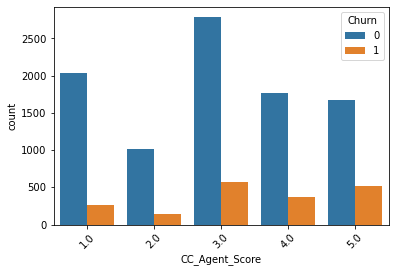

In [97]:
sns.countplot(x='CC_Agent_Score',hue='Churn',data = cc)
plt.xticks(rotation=45)
plt.show()

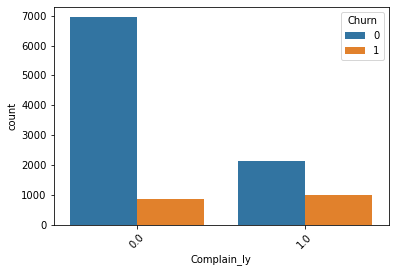

In [98]:
sns.countplot(x='Complain_ly',hue='Churn',data = cc)
plt.xticks(rotation=45)
plt.show()

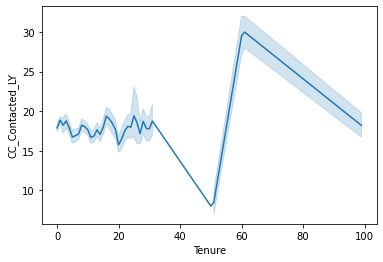

In [99]:
sns.lineplot(x='Tenure',y='CC_Contacted_LY',data=cc)
plt.show()

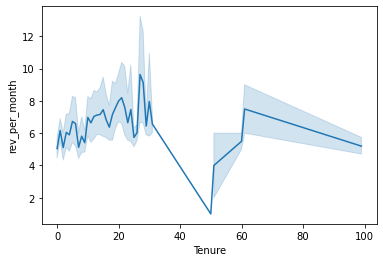

In [100]:
sns.lineplot(x='Tenure',y='rev_per_month',data=cc)
plt.show()

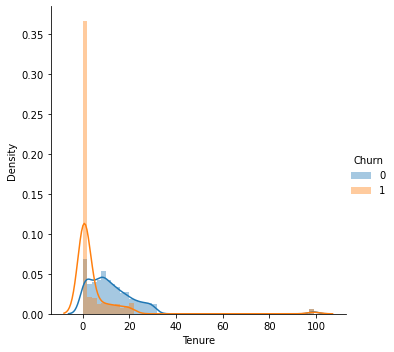

In [101]:
sns.FacetGrid(cc,hue='Churn',size=5).map(sns.distplot,'Tenure').add_legend()

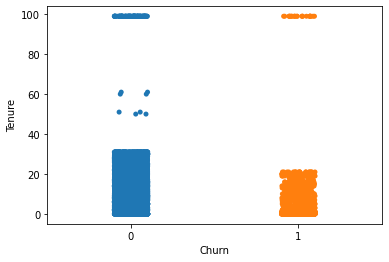

In [102]:
sns.stripplot(x='Churn',y='Tenure',data = cc)

plt.show()

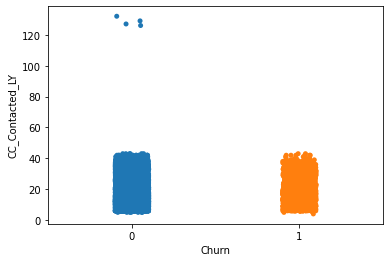

In [103]:
sns.stripplot(x='Churn',y='CC_Contacted_LY',data = cc)

plt.show()

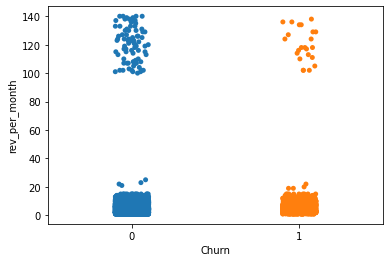

In [104]:
sns.stripplot(x='Churn',y='rev_per_month',data = cc)
plt.show()

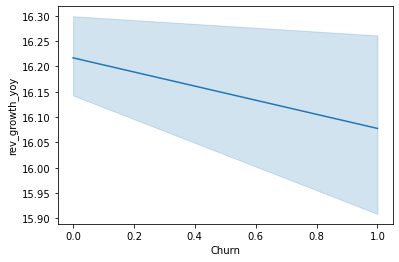

In [105]:
sns.lineplot(x='Churn',y='rev_growth_yoy',data = cc)
plt.show()

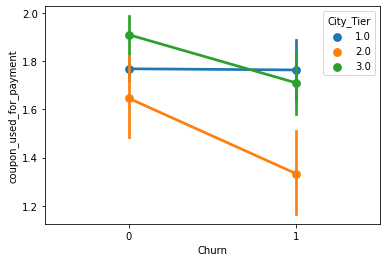

In [106]:
sns.pointplot(x='Churn',y='coupon_used_for_payment',hue='City_Tier',data = cc)
plt.show()

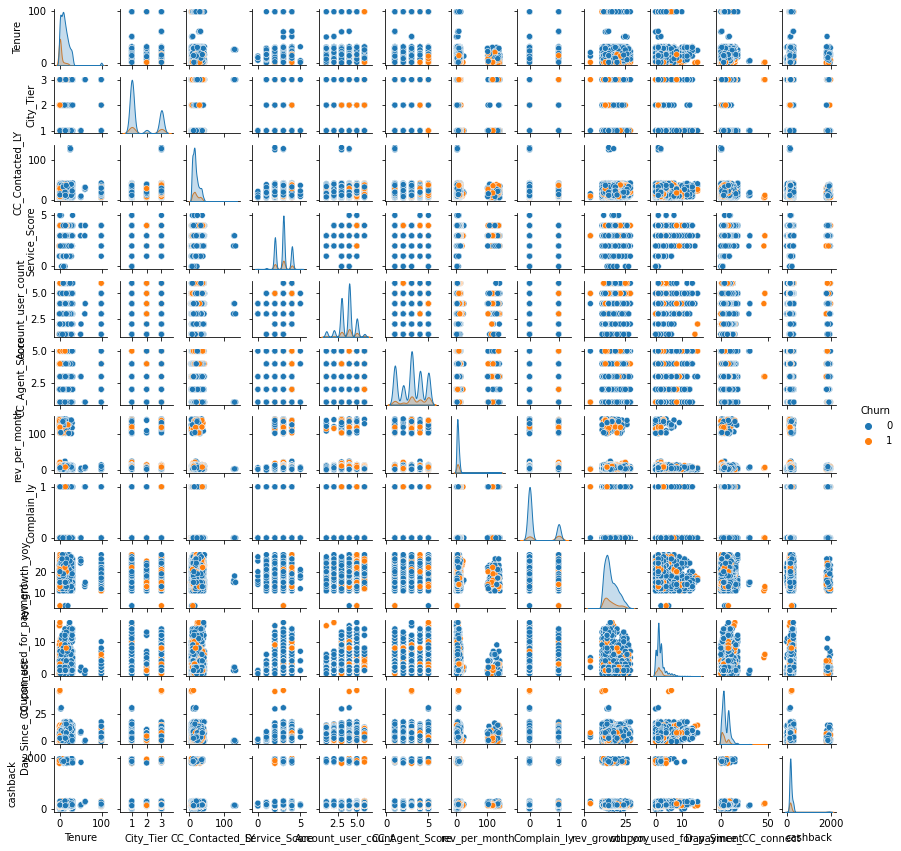

In [107]:
sns.pairplot(cc,hue='Churn',size=1)
plt.xticks(rotation=45)
plt.show()

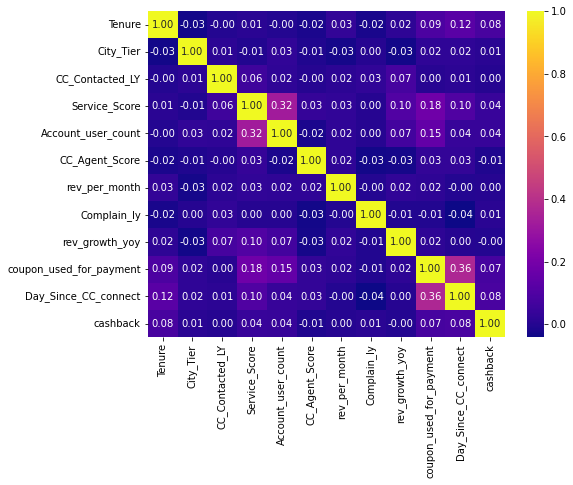

In [108]:
plt.subplots(figsize = (8,6))
sns.heatmap(cc.corr(), annot = True, cmap = 'plasma', fmt = '.2f');

## Missing Value Treatment

In [109]:
cc.Payment.mode()

0    Debit Card
dtype: object

In [110]:
cc.Gender.mode()

0    Male
dtype: object

In [111]:
cc.Marital_Status.mode()

0    Married
dtype: object

In [112]:
cc.Login_device.mode()

0    Mobile
dtype: object

In [113]:
cc.account_segment.mode()

0    Regular Plus
dtype: object

In [114]:
cc['Payment'] = cc['Payment'].fillna("Debit Card")
cc['Gender'] = cc['Gender'].fillna("Male")
cc['Marital_Status'] = cc['Marital_Status'].fillna("Married")
cc['Login_device'] = cc['Login_device'].fillna("Mobile")
cc['account_segment'] = cc['account_segment'].fillna("Regular Plus")

In [115]:
cc['Tenure'] = cc['Tenure'].fillna(cc['Tenure'].median())
cc['rev_per_month'] = cc['rev_per_month'].fillna(cc['rev_per_month'].median())
cc['Day_Since_CC_connect'] = cc['Day_Since_CC_connect'].fillna(cc['Day_Since_CC_connect'].median())
cc['cashback'] = cc['cashback'].fillna(cc['cashback'].median())
cc['Account_user_count'] = cc['Account_user_count'].fillna(cc['Account_user_count'].median())
cc['rev_growth_yoy'] = cc['rev_growth_yoy'].fillna(cc['rev_growth_yoy'].median())
cc['City_Tier'] = cc['City_Tier'].fillna(cc['City_Tier'].median())
cc['CC_Contacted_LY'] = cc['CC_Contacted_LY'].fillna(cc['CC_Contacted_LY'].median())
cc['Service_Score'] = cc['Service_Score'].fillna(cc['Service_Score'].median())
cc['CC_Agent_Score'] = cc['CC_Agent_Score'].fillna(cc['CC_Agent_Score'].median())
cc['Complain_ly'] = cc['Complain_ly'].fillna(cc['Complain_ly'].median())
cc['coupon_used_for_payment'] = cc['coupon_used_for_payment'].fillna(cc['coupon_used_for_payment'].median())

In [116]:
cc.isnull().sum()

Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

## Outlier Treatment

In [117]:
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [118]:
for feature in cc[['CC_Contacted_LY','coupon_used_for_payment','cashback','Day_Since_CC_connect','rev_per_month','Tenure']]:
    lr,ur=treat_outlier(cc[feature])
    cc[feature]=np.where(cc[feature]>ur,ur,cc[feature])
    cc[feature]=np.where(cc[feature]<lr,lr,cc[feature])

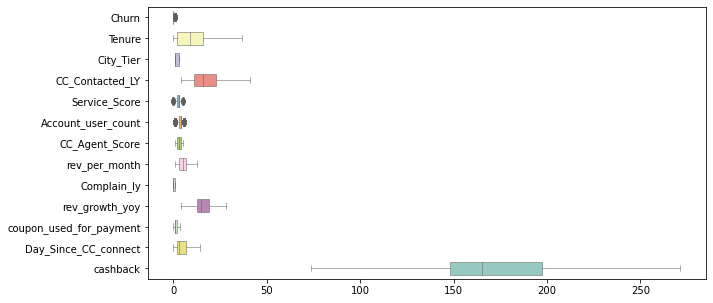

In [119]:
f, ax = plt.subplots(figsize=(10,5))
ax = sns.boxplot(data=cc,width=0.6,palette="Set3",orient='h',linewidth=0.5)

In [120]:
cc.Churn = cc.Churn.astype('int')

In [121]:
# Model Preparation
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Model Building
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


# Model Performance
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve


# Model Validation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV



In [122]:
!pip install xgboost

In [123]:
import xgboost as xgb
from xgboost import XGBClassifier

### Dummy Variables

Let us transform the categorical variables in a machine readable format.

In [124]:
df = pd.concat([pd.get_dummies(data = cc,columns =['Payment','Gender','Marital_Status','Login_device','account_segment'])],axis=1)

In [125]:
df.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,...,Marital_Status_Married,Marital_Status_Single,Login_device_Computer,Login_device_Mobile,Login_device_Others,account_segment_HNI,account_segment_Regular,account_segment_Regular Plus,account_segment_Super,account_segment_Super Plus
0,1,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,23.0,...,0,1,0,1,0,0,0,0,1,0
1,1,0.0,1.0,12.0,2.0,3.0,5.0,3.0,0.0,11.0,...,0,1,0,1,0,0,0,1,0,0
2,1,2.0,3.0,11.0,2.0,3.0,2.0,4.0,0.0,14.0,...,0,0,0,1,0,0,0,0,1,0
3,1,0.0,1.0,31.0,2.0,5.0,3.0,2.0,0.0,12.0,...,0,1,0,1,0,0,0,1,0,0
4,1,4.0,1.0,18.0,2.0,3.0,3.0,2.0,0.0,12.0,...,0,0,0,1,0,0,1,0,0,0


In [126]:
df.columns

Index(['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Service_Score',
       'Account_user_count', 'CC_Agent_Score', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback', 'Payment_Cash on Delivery', 'Payment_Credit Card',
       'Payment_Debit Card', 'Payment_E wallet', 'Payment_UPI',
       'Gender_Female', 'Gender_Male', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Login_device_Computer', 'Login_device_Mobile', 'Login_device_Others',
       'account_segment_HNI', 'account_segment_Regular',
       'account_segment_Regular Plus', 'account_segment_Super',
       'account_segment_Super Plus'],
      dtype='object')

## Checking Correlation

In [127]:
correlation = df.corr()

In [128]:
correlation['Churn'].sort_values(ascending=False)

Churn                           1.000000
Complain_ly                     0.246350
account_segment_Regular Plus    0.212896
Marital_Status_Single           0.181387
CC_Agent_Score                  0.105165
Account_user_count              0.104534
City_Tier                       0.083853
CC_Contacted_LY                 0.075345
Payment_Cash on Delivery        0.069028
Payment_E wallet                0.054330
Login_device_Computer           0.047590
rev_per_month                   0.040014
Gender_Male                     0.029114
Service_Score                   0.008936
Payment_UPI                     0.004186
Login_device_Others            -0.006402
rev_growth_yoy                 -0.013838
account_segment_HNI            -0.014119
coupon_used_for_payment        -0.018774
Marital_Status_Divorced        -0.024628
Gender_Female                  -0.029114
Payment_Debit Card             -0.032119
Login_device_Mobile            -0.042404
Payment_Credit Card            -0.047234
account_segment_

# Train and Test split

In [129]:
X = df.drop("Churn", axis=1)
y = df.pop("Churn")

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,stratify =y, random_state=1)

In [131]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (7882, 30)
X_test (3378, 30)
y_train (7882,)
y_test (3378,)


In [132]:
y_train.value_counts()/len(y_train)

0    0.831642
1    0.168358
Name: Churn, dtype: float64

In [133]:
y_test.value_counts()/len(y_test)

0    0.831557
1    0.168443
Name: Churn, dtype: float64

In [134]:
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test)

## Model Building

##### We would build the models 
    
    With balancing the data

##### Following is the list of models used in this project:

(1) Logistics Regression

(2) Decision Tree Classifier

(3) Ensemble Boosting:
Extreme Gradient Boosting

(4) Ensemble Bagging:
Random Forest


##### We will look into the models in the following steps:
    
Model Prediction, Model Performance, ROC-AUC Graph, Model Performance Metrics


### Handling class imbalance using SMOTE based techniques

We are using SMOTE method in handling the imbalance through oversampling.

In [135]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [136]:
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
#X_train, y_train = smt.fit_resample(X_train, y_train)
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({0: 6555, 1: 1327})
After Counter({0: 6555, 1: 6555})


### Model Building - Imbalanced data

In [137]:
model = list()
resample = list()
precision = list()
recall = list()
F1score = list()
AUCROC = list()

In [138]:
def test_eval(clf_model, X_test, y_test, algo=None, sampling=None):
    # Test set prediction
    y_prob=clf_model.predict_proba(X_test)
    y_pred=clf_model.predict(X_test)

    print('Confusion Matrix')
    print('='*60)
    print(confusion_matrix(y_test,y_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_test, y_prob[:,1]))
          
    model.append(algo)
    precision.append(precision_score(y_test,y_pred))
    recall.append(recall_score(y_test,y_pred))
    F1score.append(f1_score(y_test,y_pred))
    AUCROC.append(roc_auc_score(y_test, y_prob[:,1]))
    resample.append(sampling)

# Model-1: Logistic Regression

###### 1. Original Unbalanced Data

In [139]:
log_model=LogisticRegression()

params={'C':np.logspace(-10, 1, 15),'class_weight':[None,'balanced'],'penalty':['l1','l2'],'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

cv = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)

# Create grid search using 5-fold cross validation
clf_LR = GridSearchCV(log_model, params, cv=cv, scoring='roc_auc', n_jobs=-1)
clf_LR.fit(X_train, y_train)
clf_LR.best_estimator_

LogisticRegression(C=0.26826957952797276, penalty='l1', solver='saga')

In [140]:
y_predict_train = clf_LR.predict(X_train)
log_train_acc = clf_LR.score(X_train, y_train)
log_train_acc

0.8842345534883373

In [141]:
y_predict_test = clf_LR.predict(X_test)
log_test_acc = clf_LR.score(X_test, y_test)
log_test_acc

0.8706154771162988

In [142]:
confusion_matrix(y_train, y_predict_train)

array([[6363,  192],
       [ 654,  673]], dtype=int64)

In [143]:
print(classification_report(y_train, y_predict_train))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      6555
           1       0.78      0.51      0.61      1327

    accuracy                           0.89      7882
   macro avg       0.84      0.74      0.78      7882
weighted avg       0.89      0.89      0.88      7882



In [144]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'actual')

Confusion Matrix
[[2716   93]
 [ 281  288]] 

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2809
           1       0.76      0.51      0.61       569

    accuracy                           0.89      3378
   macro avg       0.83      0.74      0.77      3378
weighted avg       0.88      0.89      0.88      3378
 

AUC-ROC
0.8706154771162988


AUC: 0.884


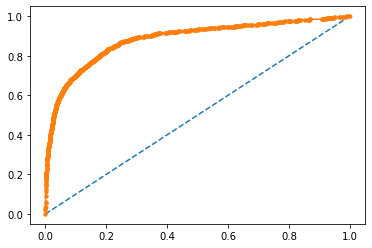

In [145]:
# AUC and ROC for the training data

# predict probabilities
probs = clf_LR.predict_proba(X_train)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
log_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % log_train_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
log_train_fpr, log_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(log_train_fpr, log_train_tpr, marker='.')

# show the plot
plt.show()
# AUC and ROC for the test data

AUC: 0.871


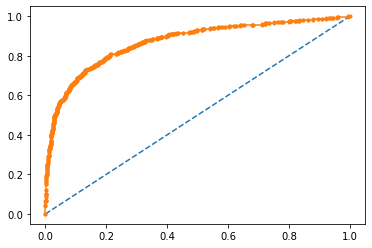

In [146]:
# AUC and ROC for the test data

# predict probabilities
probs = clf_LR.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
log_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % log_test_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
log_test_fpr, log_test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(log_test_fpr, log_test_tpr, marker='.')

# show the plot
plt.show()

###### 2.SMOTE Resampling

In [147]:
clf_LR.fit(X_train_sm, y_train_sm)
clf_LR.best_estimator_

LogisticRegression(C=10.0, penalty='l1', solver='liblinear')

In [148]:
y_predict_train_sm = clf_LR.predict(X_train_sm)
log_train_acc = clf_LR.score(X_train_sm, y_train_sm)
log_train_acc

0.8890198001886287

In [149]:
y_predict_test = clf_LR.predict(X_test)
log_test_acc = clf_LR.score(X_test, y_test)
log_test_acc

0.8697495684533959

In [150]:
confusion_matrix(y_train_sm, y_predict_train_sm)

array([[5212, 1343],
       [1099, 5456]], dtype=int64)

In [151]:
print(classification_report(y_train_sm, y_predict_train_sm))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81      6555
           1       0.80      0.83      0.82      6555

    accuracy                           0.81     13110
   macro avg       0.81      0.81      0.81     13110
weighted avg       0.81      0.81      0.81     13110



In [152]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'smote')

Confusion Matrix
[[2224  585]
 [ 122  447]] 

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.79      0.86      2809
           1       0.43      0.79      0.56       569

    accuracy                           0.79      3378
   macro avg       0.69      0.79      0.71      3378
weighted avg       0.86      0.79      0.81      3378
 

AUC-ROC
0.8697495684533959


AUC: 0.889


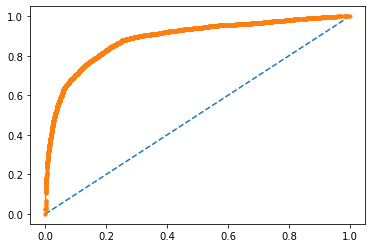

In [153]:
# AUC and ROC for the training data

# predict probabilities
probs = clf_LR.predict_proba(X_train_sm)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc1 = roc_auc_score(y_train_sm, probs)
print('AUC: %.3f' % auc1)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_sm, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


AUC: 0.870


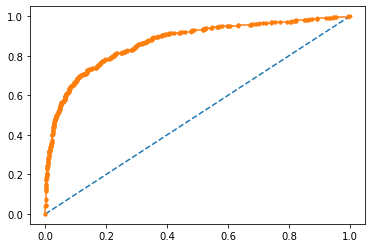

In [154]:
# AUC and ROC for the test data


# predict probabilities
probs_1t = clf_LR.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_1t = probs_1t[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc1t = roc_auc_score(y_test, probs_1t)
print('AUC: %.3f' % auc1t)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs_1t)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Model-2: Decision Tree

In [155]:
estimators = [2,10,30,50,100]
# Maximum number of depth in each tree:
max_depth = [i for i in range(5,16,2)]
# Minimum number of samples to consider to split a node:
min_samples_split = [2, 5, 10, 15, 20, 50, 100]
# Minimum number of samples to consider at each leaf node:
min_samples_leaf = [1, 2, 5]

###### 1. Original Unbalanced Data

In [156]:
clf_DT = DecisionTreeClassifier(criterion = 'gini', random_state = 1 )


clf_DT.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [157]:
from sklearn import tree

In [158]:
train_char_label = ['No', 'Yes']

In [159]:
Churn_Tree_File = open('d:\churn_tree.dot','w')

In [160]:
param_grid_clf_DT = {
    'criterion': ['gini'],
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf, 
    'min_samples_split': min_samples_split,
}


grid_search_clf_DT = GridSearchCV(estimator = clf_DT, param_grid = param_grid_clf_DT, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=2)

In [161]:
clf_DT.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [162]:
grid_search_clf_DT.fit(X_train, y_train)

Fitting 5 folds for each of 126 candidates, totalling 630 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini'],
                         'max_depth': [5, 7, 9, 11, 13, 15],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10, 15, 20, 50, 100]},
             scoring='roc_auc', verbose=2)

In [163]:
grid_search_clf_DT.best_params_

{'criterion': 'gini',
 'max_depth': 13,
 'min_samples_leaf': 2,
 'min_samples_split': 50}

In [164]:
#Regularising the tree

In [165]:
reg_clf_DT = DecisionTreeClassifier(criterion = 'gini',max_depth=13,min_samples_leaf= 2,min_samples_split= 50)

In [166]:
reg_clf_DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=13, min_samples_leaf=2, min_samples_split=50)

NEW TREE

In [167]:
y_predict_train= reg_clf_DT.predict(X_train)
dt_train_acc = reg_clf_DT.score(X_train, y_train)
dt_train_acc

0.9351687388987566

In [168]:
y_predict_test_sm = reg_clf_DT.predict(X_test)
dt_test_acc = reg_clf_DT.score(X_test, y_test)
dt_test_acc

0.9064535227945529

In [169]:
confusion_matrix(y_train, y_predict_train)

array([[6362,  193],
       [ 318, 1009]], dtype=int64)

In [170]:
print(classification_report(y_train, y_predict_train))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      6555
           1       0.84      0.76      0.80      1327

    accuracy                           0.94      7882
   macro avg       0.90      0.87      0.88      7882
weighted avg       0.93      0.94      0.93      7882



In [171]:
test_eval(reg_clf_DT, X_test, y_test, 'Decision Tree', 'actual')

Confusion Matrix
[[2671  138]
 [ 178  391]] 

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      2809
           1       0.74      0.69      0.71       569

    accuracy                           0.91      3378
   macro avg       0.84      0.82      0.83      3378
weighted avg       0.90      0.91      0.91      3378
 

AUC-ROC
0.9286125878343587


AUC: 0.976


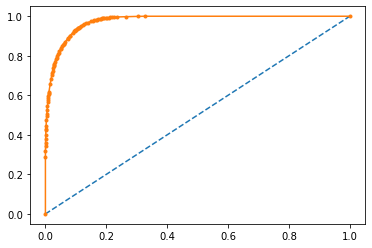

In [172]:
# AUC and ROC for the training data

# predict probabilities
probs = reg_clf_DT.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc1 = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc1)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.929


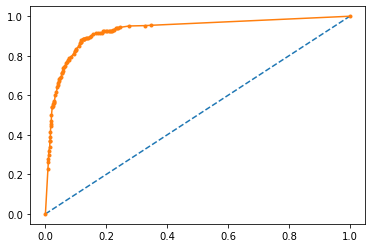

In [173]:
# AUC and ROC for the test data


# predict probabilities
probs_1t = reg_clf_DT.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_1t = probs_1t[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc1t = roc_auc_score(y_test, probs_1t)
print('AUC: %.3f' % auc1t)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs_1t)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

###### 2.SMOTE Resampling

In [174]:
reg_clf_DT.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier(max_depth=13, min_samples_leaf=2, min_samples_split=50)

In [175]:
y_predict_train_sm = reg_clf_DT.predict(X_train_sm)
dt_train_acc = reg_clf_DT.score(X_train_sm, y_train_sm)
dt_train_acc

0.9379099923722349

In [176]:
y_predict_test_sm = reg_clf_DT.predict(X_test)
dt_test_acc = reg_clf_DT.score(X_test, y_test)
dt_test_acc

0.8750740082889283

In [177]:
confusion_matrix(y_train_sm, y_predict_train_sm)

array([[6087,  468],
       [ 346, 6209]], dtype=int64)

In [178]:
print(classification_report(y_train_sm, y_predict_train_sm))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      6555
           1       0.93      0.95      0.94      6555

    accuracy                           0.94     13110
   macro avg       0.94      0.94      0.94     13110
weighted avg       0.94      0.94      0.94     13110



In [179]:
test_eval(reg_clf_DT, X_test, y_test, 'Decision Tree', 'smote')

Confusion Matrix
[[2539  270]
 [ 152  417]] 

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      2809
           1       0.61      0.73      0.66       569

    accuracy                           0.88      3378
   macro avg       0.78      0.82      0.79      3378
weighted avg       0.89      0.88      0.88      3378
 

AUC-ROC
0.9136149747140907


AUC: 0.988


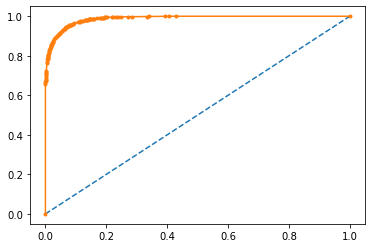

In [180]:
# AUC and ROC for the training data

# predict probabilities
probs = reg_clf_DT.predict_proba(X_train_sm)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc1 = roc_auc_score(y_train_sm, probs)
print('AUC: %.3f' % auc1)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_sm, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.914


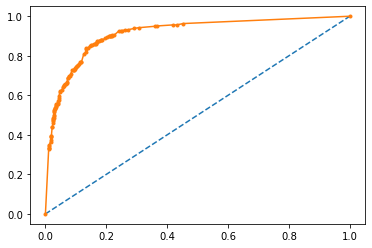

In [181]:
# AUC and ROC for the test data


# predict probabilities
probs_1t = reg_clf_DT.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_1t = probs_1t[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc1t = roc_auc_score(y_test, probs_1t)
print('AUC: %.3f' % auc1t)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs_1t)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Model-3: Random Forest

###### 1. Original Unbalanced Data

In [182]:
rf_model = RandomForestClassifier()

rf_params={'n_estimators':estimators,
           'max_depth':max_depth,
           'min_samples_split':min_samples_split}

clf_RF = RandomizedSearchCV(rf_model, rf_params, cv=cv, scoring='roc_auc', n_jobs=-1, n_iter=20, verbose=2)
clf_RF.fit(X_train, y_train)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomForestClassifier(max_depth=15, min_samples_split=5, n_estimators=30)

In [183]:
y_predict_train = clf_RF.predict(X_train)
rf_train_acc = clf_RF.score(X_train, y_train)
rf_train_acc

0.999898488070049

In [184]:
y_predict_test = clf_RF.predict(X_test)
rf_test_acc = clf_RF.score(X_test, y_test)
rf_test_acc

0.9833791209650627

In [185]:
confusion_matrix(y_train, y_predict_train)

array([[6554,    1],
       [  47, 1280]], dtype=int64)

In [186]:
print(classification_report(y_train, y_predict_train))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6555
           1       1.00      0.96      0.98      1327

    accuracy                           0.99      7882
   macro avg       1.00      0.98      0.99      7882
weighted avg       0.99      0.99      0.99      7882



In [187]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'actual')

Confusion Matrix
[[2774   35]
 [ 136  433]] 

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2809
           1       0.93      0.76      0.84       569

    accuracy                           0.95      3378
   macro avg       0.94      0.87      0.90      3378
weighted avg       0.95      0.95      0.95      3378
 

AUC-ROC
0.9833791209650627


AUC: 1.000


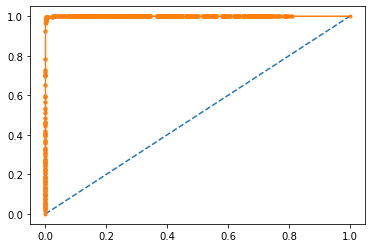

In [188]:
# AUC and ROC for the training data

# predict probabilities
probs = clf_RF.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc1 = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc1)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.983


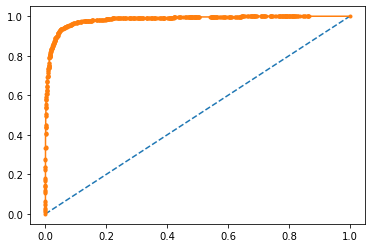

In [189]:
# AUC and ROC for the test data


# predict probabilities
probs_1t = clf_RF.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_1t = probs_1t[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc1t = roc_auc_score(y_test, probs_1t)
print('AUC: %.3f' % auc1t)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs_1t)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

###### 2.SMOTE Resampling

In [190]:
clf_RF.fit(X_train_sm, y_train_sm)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomForestClassifier(max_depth=13, n_estimators=50)

In [191]:
y_predict_train_sm = clf_RF.predict(X_train_sm)
rf_train_acc = clf_RF.score(X_train_sm, y_train_sm)
rf_train_acc

0.9999364643825263

In [192]:
y_predict_test_sm = clf_RF.predict(X_test)
rf_test_acc = clf_RF.score(X_test, y_test)
rf_test_acc

0.9809224805280041

In [193]:
confusion_matrix(y_train_sm, y_predict_train_sm)

array([[6527,   28],
       [  26, 6529]], dtype=int64)

In [194]:
print(classification_report(y_train_sm, y_predict_train_sm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      6555

    accuracy                           1.00     13110
   macro avg       1.00      1.00      1.00     13110
weighted avg       1.00      1.00      1.00     13110



In [195]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'smote')

Confusion Matrix
[[2723   86]
 [  93  476]] 

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2809
           1       0.85      0.84      0.84       569

    accuracy                           0.95      3378
   macro avg       0.91      0.90      0.90      3378
weighted avg       0.95      0.95      0.95      3378
 

AUC-ROC
0.9809224805280041


AUC: 1.000


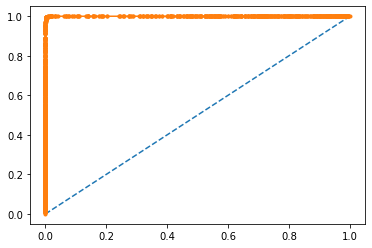

In [196]:
# AUC and ROC for the training data

# predict probabilities
probs = clf_RF.predict_proba(X_train_sm)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc1 = roc_auc_score(y_train_sm, probs)
print('AUC: %.3f' % auc1)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_sm, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.981


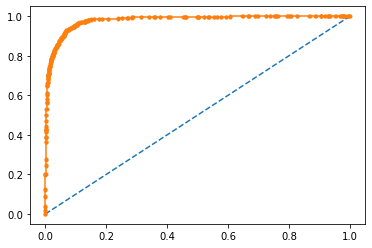

In [197]:
# AUC and ROC for the test data


# predict probabilities
probs_1t = clf_RF.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_1t = probs_1t[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc1t = roc_auc_score(y_test, probs_1t)
print('AUC: %.3f' % auc1t)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs_1t)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Model 4: Extreme Gradient Boosting

###### 1. Original Unbalanced Data

In [198]:
clf_xgb = XGBClassifier(colsample_bylevel = 0.9, 
                    colsample_bytree = 0.8,
                    max_depth=8,
                    learning_rate = 0.1,
                    n_estimators = 100, 
                    objective ='binary:logistic', 
                    )
clf_xgb = clf_xgb.fit(X_train, y_train)

In [199]:
y_predict_train= clf_xgb.predict(X_train)
xgb_train_acc = clf_xgb.score(X_train, y_train)
xgb_train_acc

0.9958132453691957

In [200]:
y_predict_test = clf_xgb.predict(X_test)
xgb_test_acc = clf_xgb.score(X_test, y_test)
xgb_test_acc

0.9582593250444049

In [201]:
confusion_matrix(y_train, y_predict_train)

array([[6554,    1],
       [  32, 1295]], dtype=int64)

In [202]:
print(classification_report(y_train, y_predict_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      0.98      0.99      1327

    accuracy                           1.00      7882
   macro avg       1.00      0.99      0.99      7882
weighted avg       1.00      1.00      1.00      7882



In [203]:
test_eval(clf_xgb, X_test, y_test, 'XGB', 'actual')

Confusion Matrix
[[2770   39]
 [ 102  467]] 

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2809
           1       0.92      0.82      0.87       569

    accuracy                           0.96      3378
   macro avg       0.94      0.90      0.92      3378
weighted avg       0.96      0.96      0.96      3378
 

AUC-ROC
0.9879410956872869


AUC: 1.000


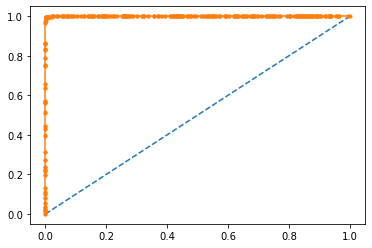

In [204]:
# AUC and ROC for the training data

# predict probabilities
probs = clf_xgb.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc1 = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc1)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.988


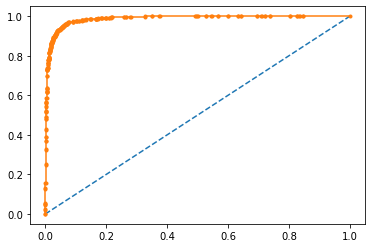

In [205]:
# AUC and ROC for the test data


# predict probabilities
probs_1t = clf_xgb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_1t = probs_1t[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc1t = roc_auc_score(y_test, probs_1t)
print('AUC: %.3f' % auc1t)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs_1t)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

###### 2.SMOTE Resampling

In [206]:
clf_xgb.fit(X_train_sm, y_train_sm)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=0.9, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [207]:
y_predict_train_sm = clf_xgb.predict(X_train_sm)
xgb_train_acc = clf_xgb.score(X_train_sm, y_train_sm)
xgb_train_acc

0.9963386727688787

In [208]:
y_predict_test_sm = clf_xgb.predict(X_test)
xgb_test_acc = clf_xgb.score(X_test, y_test)
xgb_test_acc

0.9496743635287153

In [209]:
confusion_matrix(y_train_sm, y_predict_train_sm)

array([[6544,   11],
       [  37, 6518]], dtype=int64)

In [210]:
print(classification_report(y_train_sm, y_predict_train_sm))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6555
           1       1.00      0.99      1.00      6555

    accuracy                           1.00     13110
   macro avg       1.00      1.00      1.00     13110
weighted avg       1.00      1.00      1.00     13110



In [211]:
test_eval(clf_xgb, X_test, y_test, 'XGB', 'smote')

Confusion Matrix
[[2746   63]
 [ 107  462]] 

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2809
           1       0.88      0.81      0.84       569

    accuracy                           0.95      3378
   macro avg       0.92      0.89      0.91      3378
weighted avg       0.95      0.95      0.95      3378
 

AUC-ROC
0.9800209094418455


AUC: 1.000


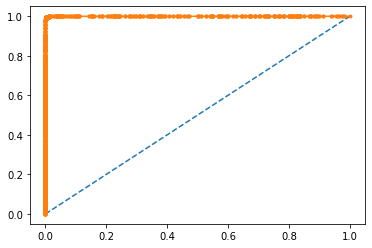

In [212]:
# AUC and ROC for the training data

# predict probabilities
probs = clf_xgb.predict_proba(X_train_sm)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc1 = roc_auc_score(y_train_sm, probs)
print('AUC: %.3f' % auc1)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_sm, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.980


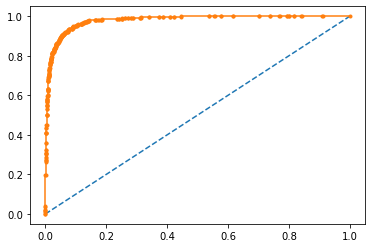

In [213]:
# AUC and ROC for the test data


# predict probabilities
probs_1t = clf_xgb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_1t = probs_1t[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc1t = roc_auc_score(y_test, probs_1t)
print('AUC: %.3f' % auc1t)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs_1t)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Model Comparison

In [214]:
clf_eval_df = pd.DataFrame({'model':model,
                            'resample':resample,
                            'precision':precision,
                            'recall':recall,
                            'f1-score':F1score,
                            'AUC-ROC':AUCROC})

In [215]:
clf_eval_df 

,model,resample,precision,recall,f1-score,AUC-ROC
0,Logistic Regression,actual,0.755906,0.506151,0.606316,0.870615
1,Logistic Regression,smote,0.433140,0.785589,0.558401,0.869750
2,Decision Tree,actual,0.739130,0.687170,0.712204,0.928613
3,Decision Tree,smote,0.606987,0.732865,0.664013,0.913615
4,Random Forest,actual,0.925214,0.760984,0.835101,0.983379
5,Random Forest,smote,0.846975,0.836555,0.841733,0.980922
6,XGB,actual,0.922925,0.820738,0.868837,0.987941
7,XGB,smote,0.880000,0.811951,0.844607,0.980021


In [216]:
#As the recursive execution of models happened, rows got appended. Thus, let us use iloc to selcet the correct rows.

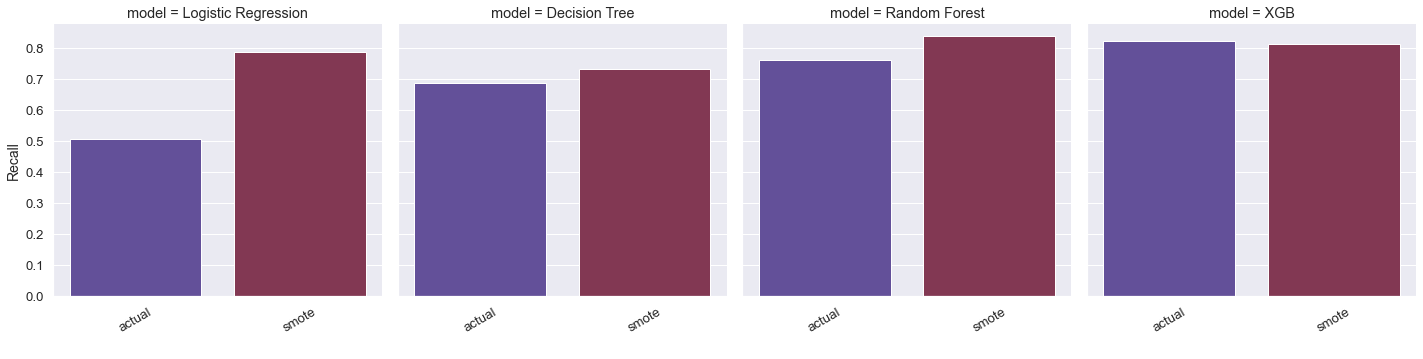

In [217]:
sns.set(font_scale=1.2)
#sns.palplot(sns.color_palette())
g = sns.FacetGrid(clf_eval_df , col="model", height=5)
g.map(sns.barplot, "resample", "recall", palette='twilight', order=["actual", "smote"])
g.set_xticklabels(rotation=30)
g.set_xlabels(' ', fontsize=14)
g.set_ylabels('Recall', fontsize=14)

In [218]:
f1 = 'weight'
Imp1 = clf_xgb.get_booster().get_score(importance_type= f1)
Imp1

{'f0': 704.0,
 'f1': 312.0,
 'f2': 810.0,
 'f3': 250.0,
 'f4': 461.0,
 'f5': 567.0,
 'f6': 743.0,
 'f7': 181.0,
 'f8': 698.0,
 'f9': 450.0,
 'f10': 791.0,
 'f11': 871.0,
 'f12': 120.0,
 'f13': 160.0,
 'f14': 144.0,
 'f15': 114.0,
 'f16': 95.0,
 'f17': 153.0,
 'f18': 84.0,
 'f19': 81.0,
 'f20': 181.0,
 'f21': 181.0,
 'f22': 177.0,
 'f23': 94.0,
 'f24': 22.0,
 'f25': 77.0,
 'f26': 25.0,
 'f27': 116.0,
 'f28': 164.0,
 'f29': 30.0}

In [219]:
f2 = 'cover'
Imp2 = clf_xgb.get_booster().get_score(importance_type= f2)
Imp2

{'f0': 200.78826904296875,
 'f1': 57.24597930908203,
 'f2': 41.53300094604492,
 'f3': 71.19146728515625,
 'f4': 157.41424560546875,
 'f5': 90.94353485107422,
 'f6': 124.55518341064453,
 'f7': 400.5649719238281,
 'f8': 48.023380279541016,
 'f9': 82.54757690429688,
 'f10': 86.92489624023438,
 'f11': 56.87413787841797,
 'f12': 76.83003234863281,
 'f13': 55.949798583984375,
 'f14': 46.56303024291992,
 'f15': 57.93077850341797,
 'f16': 144.75051879882812,
 'f17': 28.541109085083008,
 'f18': 42.38389587402344,
 'f19': 44.9376106262207,
 'f20': 104.1955795288086,
 'f21': 103.28265380859375,
 'f22': 53.20052719116211,
 'f23': 35.50172424316406,
 'f24': 71.17720794677734,
 'f25': 108.69584655761719,
 'f26': 50.957359313964844,
 'f27': 123.08204650878906,
 'f28': 71.38284301757812,
 'f29': 62.939693450927734}

In [220]:
f = 'gain'
Imp = clf_xgb.get_booster().get_score(importance_type= f)
Imp

{'f0': 37.52865982055664,
 'f1': 7.290665626525879,
 'f2': 4.1999101638793945,
 'f3': 4.970069885253906,
 'f4': 16.31830406188965,
 'f5': 8.6827392578125,
 'f6': 9.083579063415527,
 'f7': 34.94663619995117,
 'f8': 4.5024800300598145,
 'f9': 7.253380298614502,
 'f10': 6.966243267059326,
 'f11': 4.037238121032715,
 'f12': 5.867986679077148,
 'f13': 7.552518367767334,
 'f14': 5.134444713592529,
 'f15': 5.957444190979004,
 'f16': 5.144082546234131,
 'f17': 4.477161407470703,
 'f18': 5.405588626861572,
 'f19': 3.7755966186523438,
 'f20': 10.919342994689941,
 'f21': 12.23233413696289,
 'f22': 5.423672676086426,
 'f23': 5.977736949920654,
 'f24': 3.0451695919036865,
 'f25': 7.2996745109558105,
 'f26': 5.642751693725586,
 'f27': 18.134748458862305,
 'f28': 9.543159484863281,
 'f29': 7.36181640625}

To determine the best model for customer churn prediction, let's analyze the provided metrics—precision, recall, F1-score, and AUC-ROC—keeping in mind that each metric gives insight into different aspects of the model's performance.

**Metrics Overview:**
Precision: Measures the accuracy of positive predictions. High precision means fewer false positives.

Recall: Measures the ability to capture all actual positives. High recall means fewer false negatives.

F1-Score: Harmonic mean of precision and recall. It balances the trade-off between precision and recall.

AUC-ROC: Measures the ability of the model to distinguish between classes. Higher values indicate better performance.

**Model Analysis:**

#### Logistic Regression:

Without SMOTE: Decent AUC-ROC (0.8706), but lower recall (0.5062) and F1-score (0.6063).

With SMOTE: Improved recall (0.7856) but a drop in precision (0.4331) and F1-score (0.5584).

#### Decision Tree:

Without SMOTE: Good balance with a high AUC-ROC (0.9286), decent recall (0.6872), and F1-score (0.7122).

With SMOTE: Improved recall (0.7329) but a drop in precision (0.6070) and F1-score (0.6640).

#### Random Forest:

Without SMOTE: High AUC-ROC (0.9834), high precision (0.9252), and a strong F1-score (0.8351).

With SMOTE: Slight drop in precision (0.8470), but recall improves to 0.8366, with a high F1-score (0.8417).

#### XGBoost (XGB):

Without SMOTE: Highest AUC-ROC (0.9879), high precision (0.9229), and the best F1-score (0.8688).

With SMOTE: Slight decrease in performance across all metrics compared to without SMOTE, but still strong.


**Conclusion:**

The XGBoost without SMOTE model stands out as the best option for predicting customer churn based on these metrics. It offers:

The highest AUC-ROC (0.9879), indicating excellent performance in distinguishing between classes.

A strong balance between precision (0.9229) and recall (0.8207), resulting in the highest F1-score (0.8688).

This model is likely to provide the most reliable and accurate predictions in this scenario.

<center> END <center>